In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dell\Anaconda3\anaconda

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.2            |     pyh9f0ad1d_0          59 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzip2-1.0.6          |                6         100 KB
    m2w64-crt-git-

In [11]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [18]:
df= pd.read_csv(r'C:\Users\dell\Downloads\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [21]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [22]:
f=df.sort_values('Date')

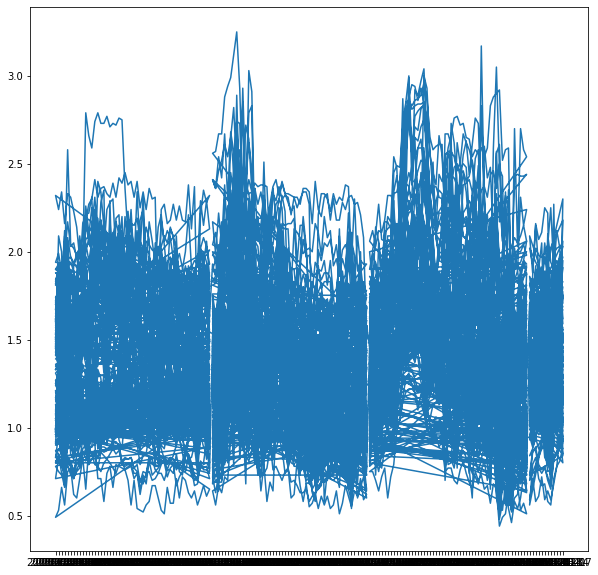

In [24]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'],df['AveragePrice'])

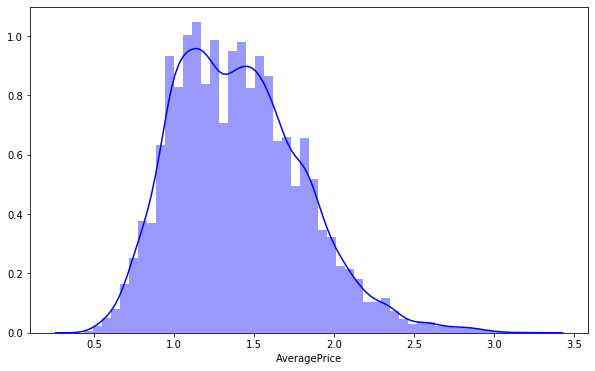

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df['AveragePrice'],color='b')

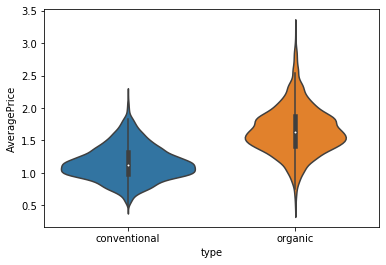

In [26]:
sns.violinplot(y='AveragePrice',x='type',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

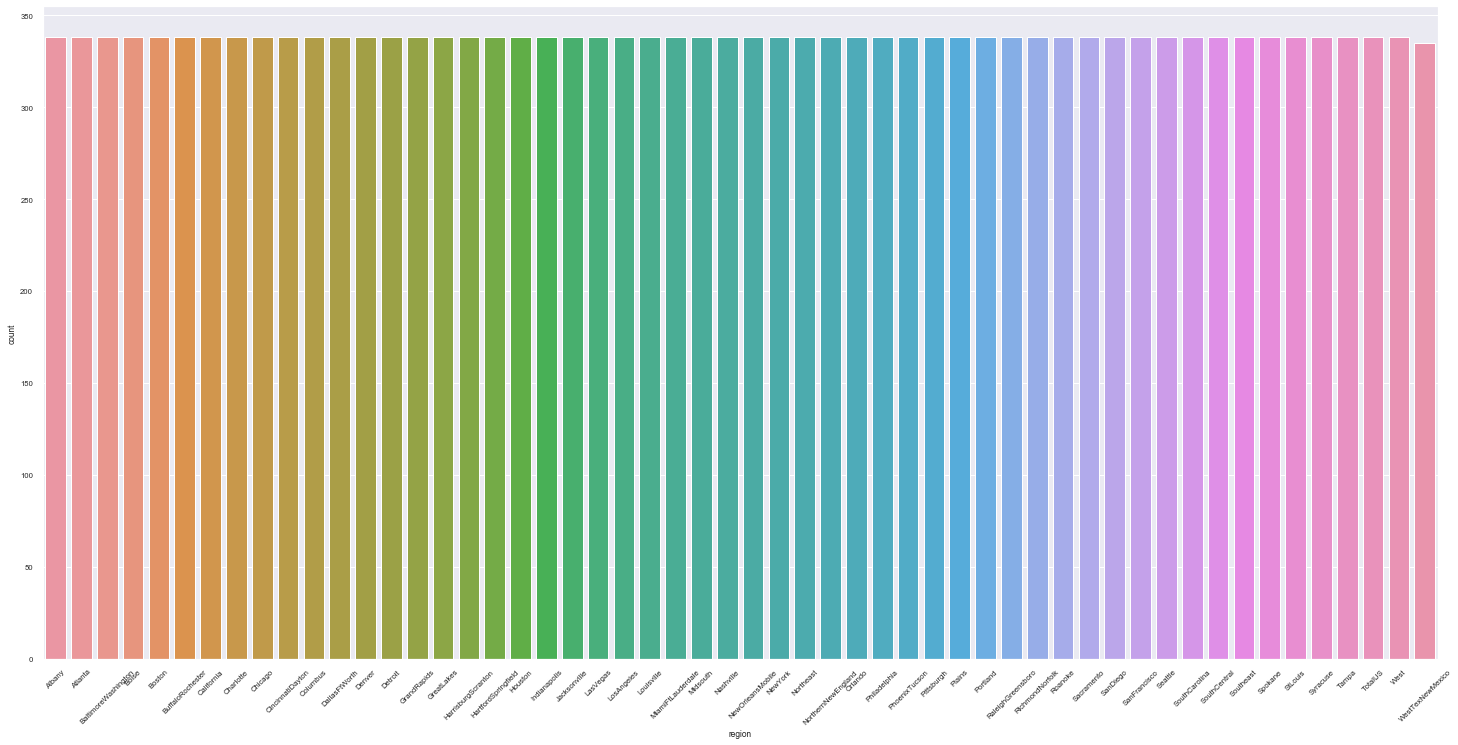

In [27]:
sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data =df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

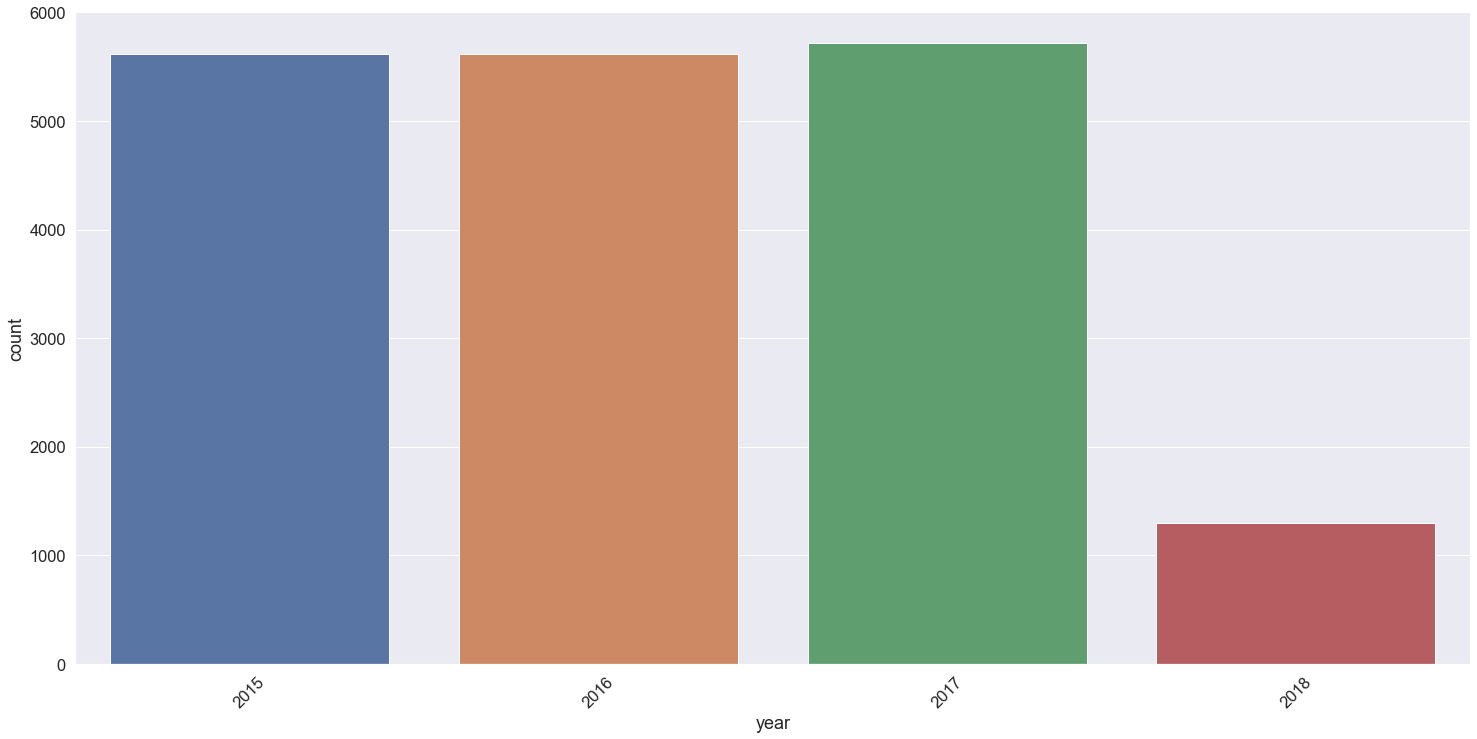

In [28]:
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

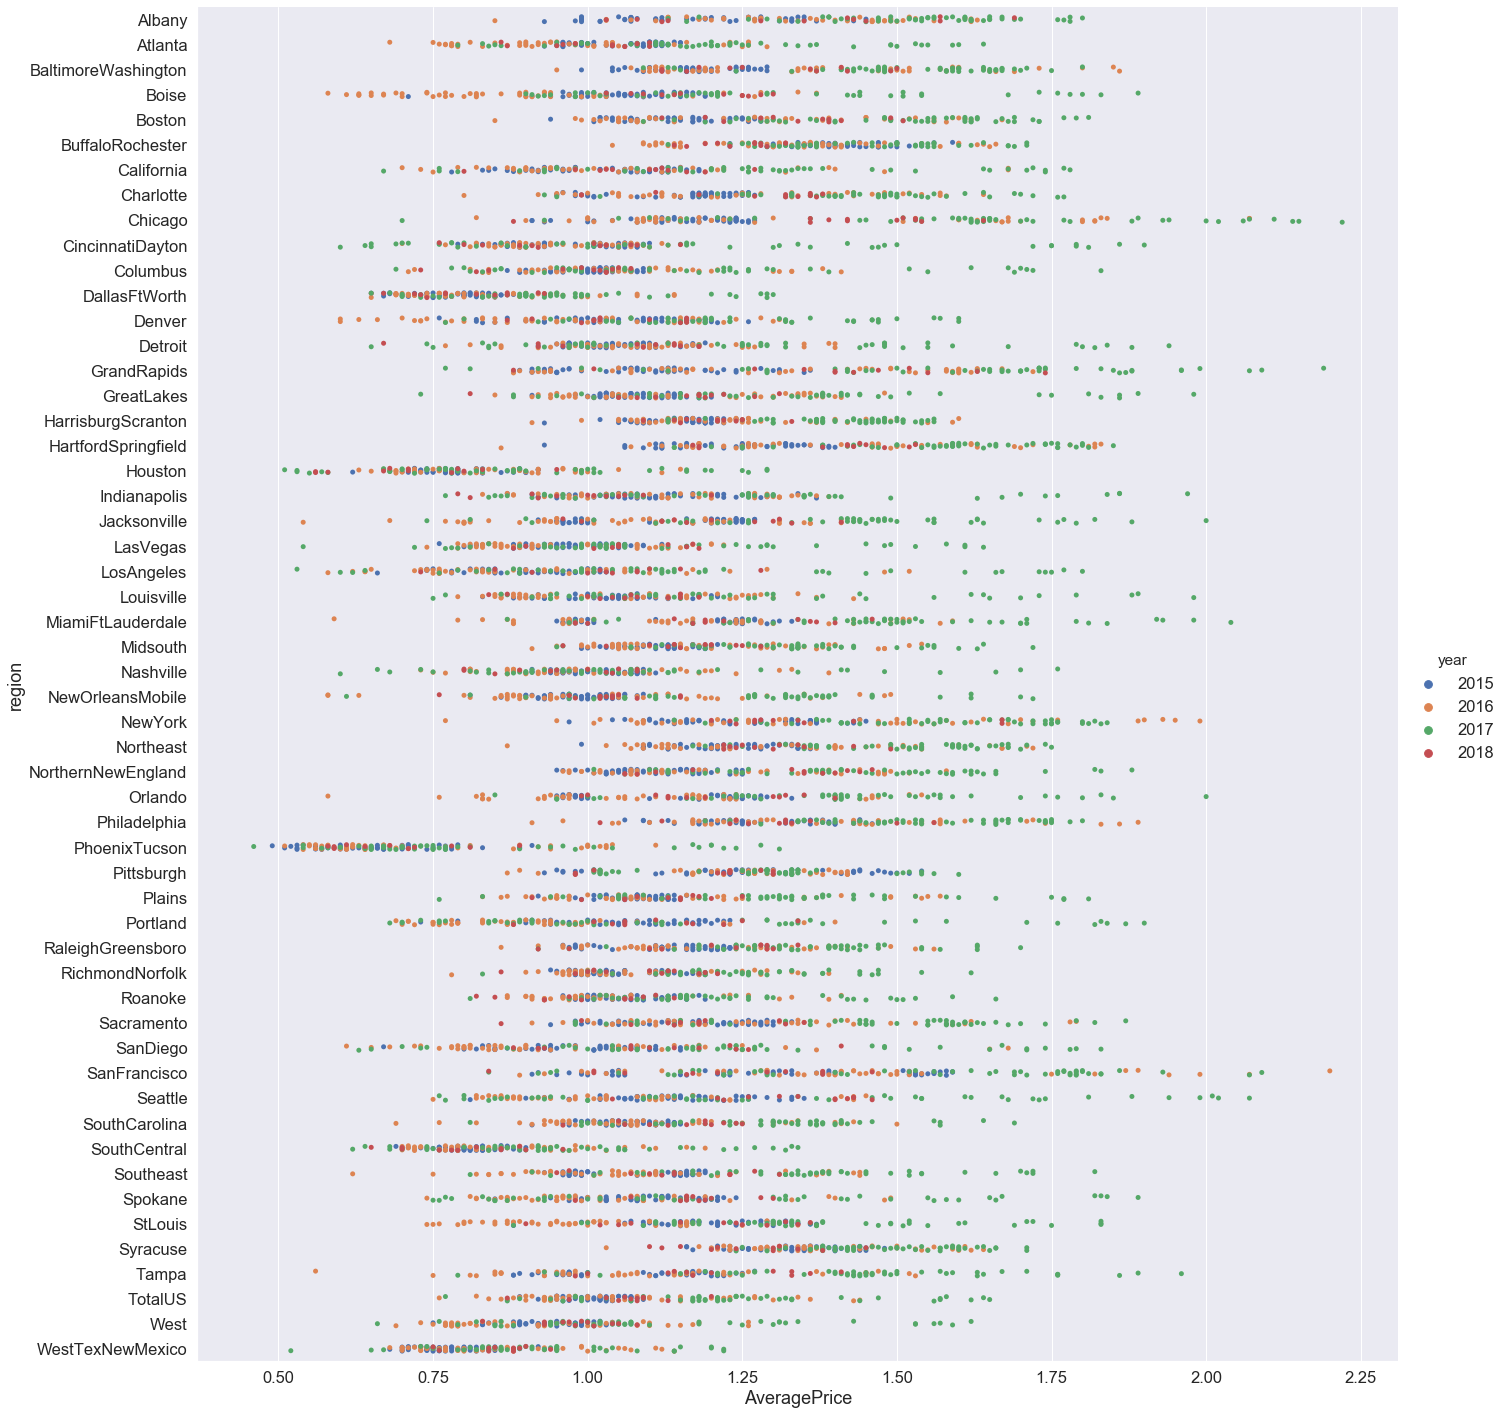

In [30]:
conventional = sns.catplot('AveragePrice','region',data=df[df['type']=='conventional'],height=20,hue='year')

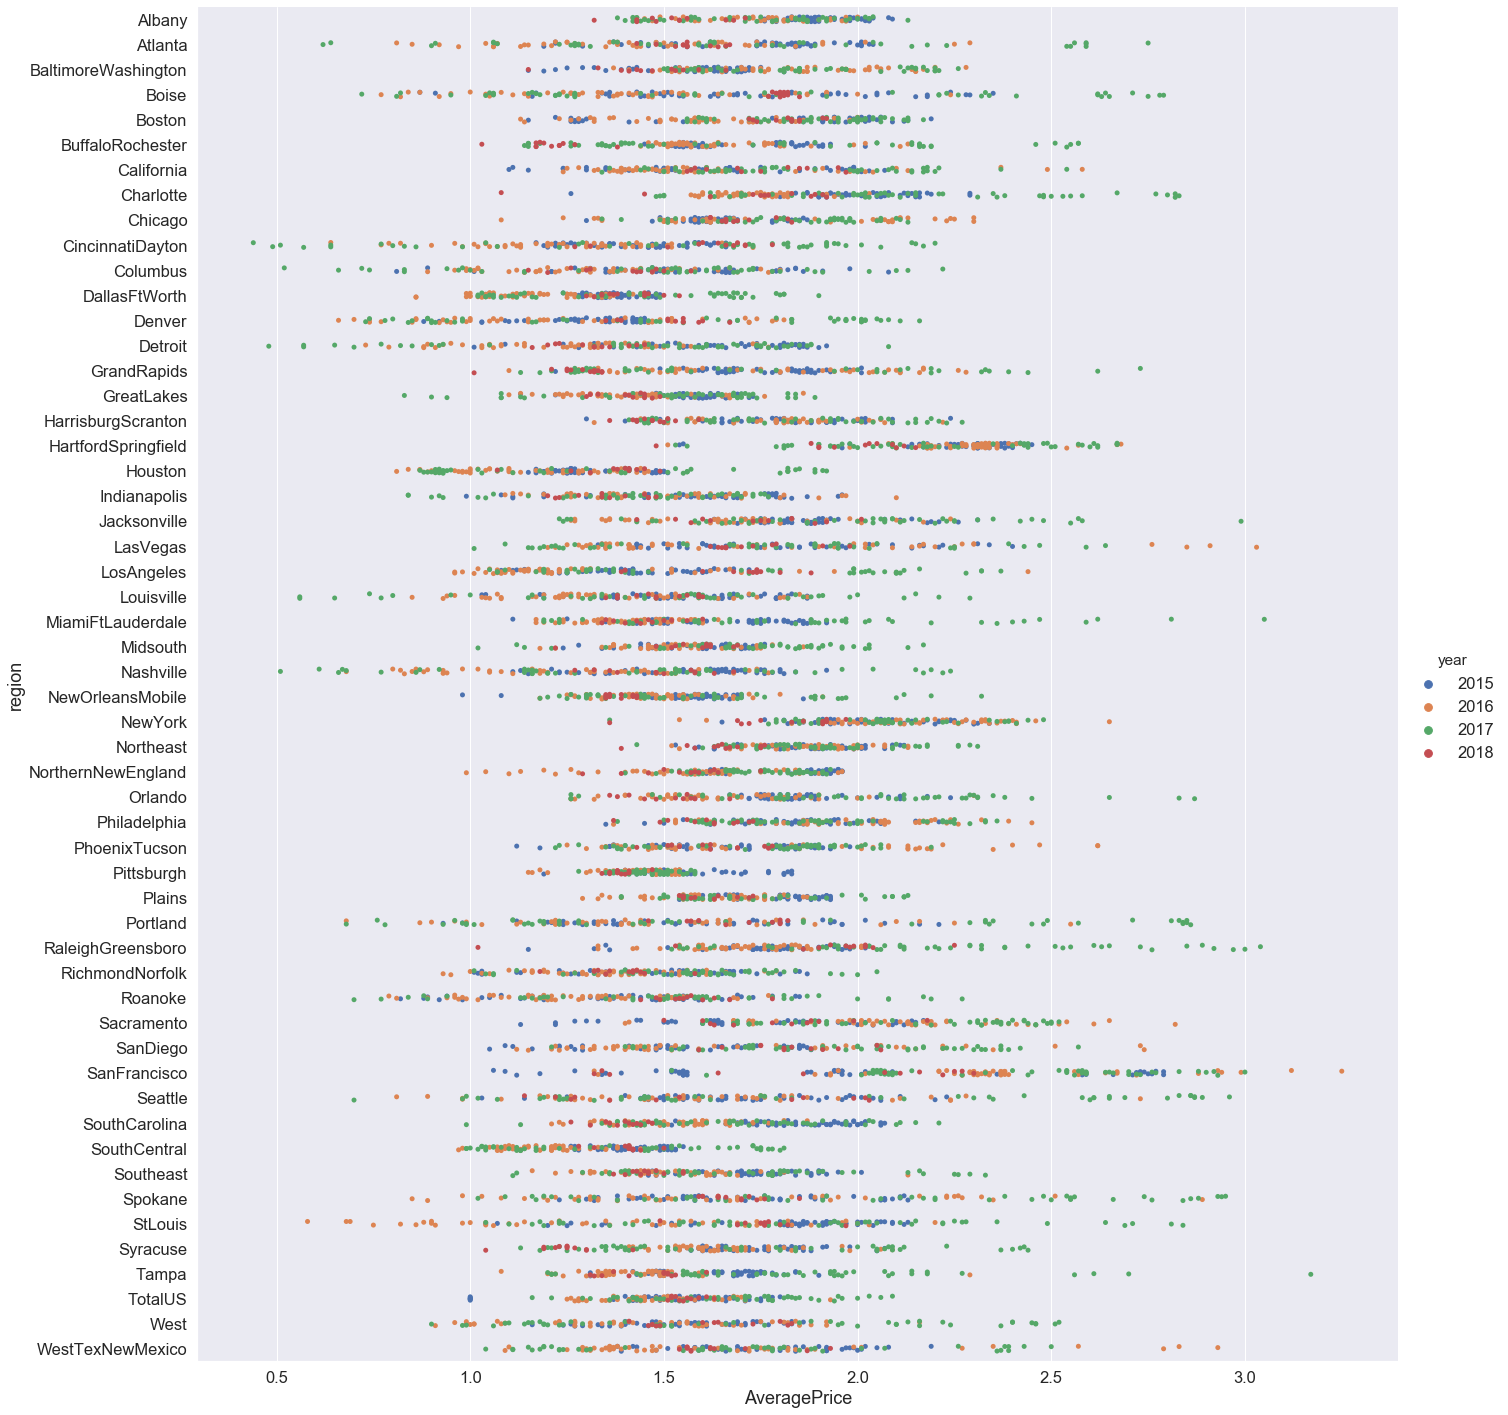

In [31]:
conventional = sns.catplot('AveragePrice','region',data=df[df['type']=='organic'],height=20,hue='year')

In [32]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [33]:
proph_df=df[['Date','AveragePrice']]

In [34]:
proph_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
5,2015-11-22,1.26
6,2015-11-15,0.99
7,2015-11-08,0.98
8,2015-11-01,1.02
9,2015-10-25,1.07


In [35]:
proph_df=proph_df.rename(columns={'Date':'ds' , 'AveragePrice':'y'})
proph_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
5,2015-11-22,1.26
6,2015-11-15,0.99
7,2015-11-08,0.98
8,2015-11-01,1.02
9,2015-10-25,1.07


In [36]:
m=Prophet()
m.fit(proph_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.502820,0.907362,1.884204,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
1,2015-01-04,1.502820,0.897877,1.881080,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
2,2015-01-04,1.502820,0.896819,1.919030,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
3,2015-01-04,1.502820,0.878057,1.862656,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
4,2015-01-04,1.502820,0.888065,1.853700,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
5,2015-01-04,1.502820,0.896384,1.897081,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
6,2015-01-04,1.502820,0.929073,1.901494,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
7,2015-01-04,1.502820,0.922767,1.866985,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
8,2015-01-04,1.502820,0.866586,1.872099,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676
9,2015-01-04,1.502820,0.925508,1.868300,1.502820,1.502820,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,-0.118145,0.0,0.0,0.0,1.384676


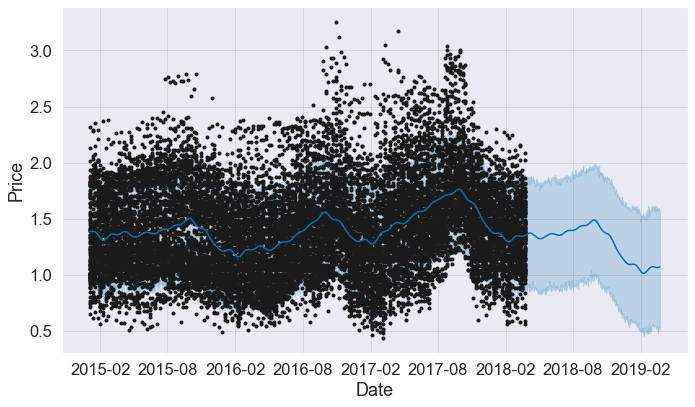

In [39]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

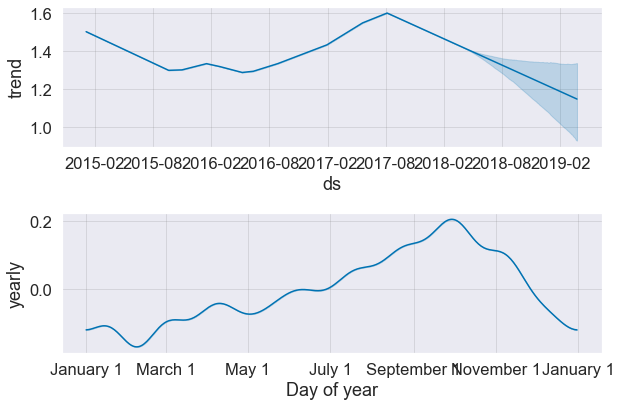

In [40]:
figure2=m.plot_components(forecast)

In [41]:
df= pd.read_csv(r'C:\Users\dell\Downloads\avocado.csv')


In [42]:
df_sample=df[df['region']=='West']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


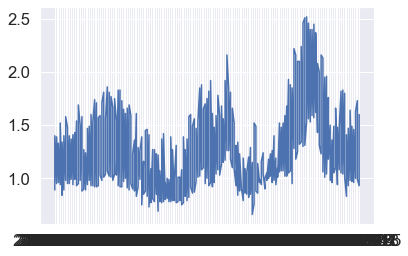

In [43]:
df_sample=df_sample.sort_values('Date')
plt.plot(df_sample['Date'],df_sample['AveragePrice'])

In [44]:
df_sample=df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [45]:
m = Prophet()
m.fit(df_sample)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


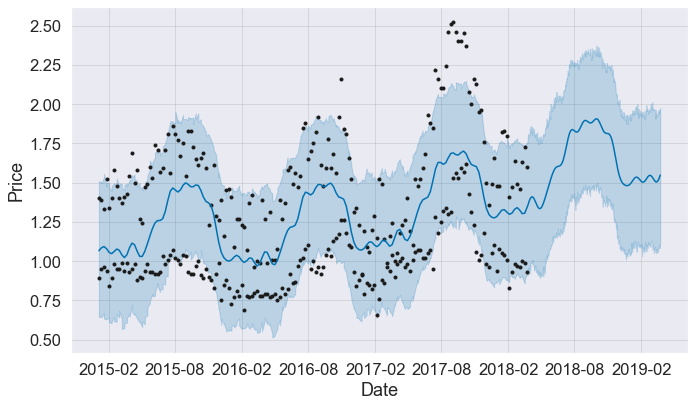

In [46]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

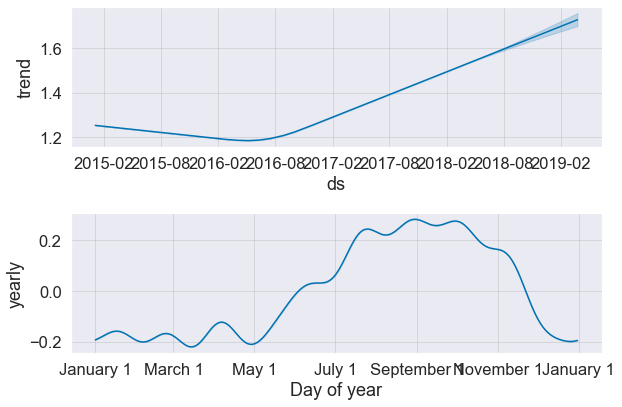

In [47]:
figure3 = m.plot_components(forecast)